# Small Multiples
----

Created by Cristian E. Nuno

Date: August 14, 2019

![example](small_multiples_example.png)

## Overview

Small multiples is a visualization technique that partions your data such that you're visualizing one piece of it at a time. These pieces are stored as series of individual plots (i.e. subplots) that share the same x and y-axes. 

Having each subplot on the same scale makes it easier for the reader to compare one subplot to the next without having to mentally account for different scales.

## Goal

For you to be able to create small multiples in python using [`matplotlib`](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html).

### Inspiration

This tutorial was inspired by Yan Holtz's [_Small Multiples for Line Charts_](https://python-graph-gallery.com/125-small-multiples-for-line-chart/) tutorial. 


In [99]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Here, each record in `df` represents the average number of commits each team member has, per hour,  over the course of one hackathon.

In [100]:
# import necessary data
df = pd.read_csv("commits_per_hour_long.csv")
df['num_repos'] = 42
df.head()

,hour,variable,value,num_repos
0,1,sam,4.724404,42
1,2,sam,6.851426,42
2,3,sam,5.314597,42
3,4,sam,3.151479,42
4,5,sam,4.712608,42


In [101]:
df[:20]

,hour,variable,value,num_repos
0,1,sam,4.724404,42
1,2,sam,6.851426,42
2,3,sam,5.314597,42
3,4,sam,3.151479,42
4,5,sam,4.712608,42
5,6,sam,7.676891,42
6,7,sam,4.827679,42
7,8,sam,6.691967,42
8,9,sam,3.939243,42
9,10,sam,4.386169,42


### Reshaping Data from Long to Wide

This is an example of reshaping from wide to long:
![wide to long](wide_to_long.png)

This is an example of reshaping from long to wide:
![long to wide](long_to_wide.png)


When making visualizations, knowing which shape your data needs to be in is half the battle. In this case, we want to transform `df` such that is reshaped from long to wide.

*Images created by RStudio. Source: https://github.com/rstudio/cheatsheets/blob/master/data-import.pdf*

In [102]:
# creating a data frame where the first column is our x-variable (hour) and our subsequent 
# columns are the individual plots (which person (alex, sam, etc))
# dataframe.pivot: index = our new first column, x-variable
#                  columns = for each unique value in the column
#                  values = assigns observation value (can take a list)

# idk what reset_index() does...

df_wide = df.pivot(index='hour', columns="variable", values="value").reset_index()
df_wide.head()

# check to see that the first column is hour
df_wide.columns

Index(['hour', 'addison', 'alex', 'blake', 'cameron', 'dakota', 'jaime',
       'jordan', 'kieran', 'sam'],
      dtype='object', name='variable')

Now we'll do some styling before any creation of the figure and subplots. 

See [here for more information on style sheets](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html) and [here for information on color maps (i.e. color palettes)](https://matplotlib.org/users/colormaps.html).

In [103]:
# enforce a specific plot style sheet
plt.style.use("dark_background")

# create a color palette
palette = plt.get_cmap("Paired")

#### Creating Small Multiples

##### `fig` and `axs`

As seen [in the `matplotlib` documentation](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html#stacking-subplots-in-two-directions), we want to create a plot figure that contains a 3X3 grid. Each of the 9 subplots will be accessible by indexing the `axs` object. 

##### Indexing `axs`

To access the subplot in the upper left corner, index `axs` by typing `axs[0, 0]`. You read that as "the subplot in the first row in the first column". 

To access the subplot in the bottom right corner, you type `axs[2, 2]`. You read that as "the subplot in the third row in the third column".

*Always helpful to remember that [Python using zero based indexing](http://python-history.blogspot.com/2013/10/why-python-uses-0-based-indexing.html).*

To avoid manually typing each subplot, we'll access each subplot by using two `for` loops: one for `row` and one for `column`. Additionally, we'll add a value of `1` to the `counter` object after each subplot so that we can highlight one teammate in color.

##### Adding things to the `fig`

Only after the subplots are drawn do we worry about adding elements to `fig`. Here, we'll be creating a title that will be placed in the middle of the figure at the very top. We'll also be adding labels to the x and y-axis. 

Finally, we'll save the figure as a `PNG` file.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c550dd8>,
      dtype=object)

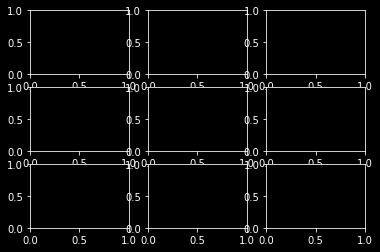

In [104]:
# create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=3)
axs

In [105]:
# print the row of plots
for row in range(3):
    print(axs[row])
    print('------')
    
# need to do plotting commands on each plot - can't do all the plots in one line

------
------
------


In [106]:
# print each plot
for row in range(axs.shape[0]):
    print(f"---- row {row} ----")
    for col in range(axs.shape[1]):
        print(f'    **** col {col} ****')
        print(f'      {axs[row][col]}')

---- row 0 ----
    **** col 0 ****
      AxesSubplot(0.125,0.657941;0.227941x0.222059)
    **** col 1 ****
      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
    **** col 2 ****
      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
---- row 1 ----
    **** col 0 ****
      AxesSubplot(0.125,0.391471;0.227941x0.222059)
    **** col 1 ****
      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
    **** col 2 ****
      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
---- row 2 ----
    **** col 0 ****
      AxesSubplot(0.125,0.125;0.227941x0.222059)
    **** col 1 ****
      AxesSubplot(0.398529,0.125;0.227941x0.222059)
    **** col 2 ****
      AxesSubplot(0.672059,0.125;0.227941x0.222059)


In [107]:
axs.shape

(3, 3)

In [110]:
# counter will store the feature index to use when highlighting a particular teammate in each subplot
counter = 0

# plot every feature in each subplot in gray color (plot everyone in gray)
n_rows = range(axs.shape[0])
n_cols = range(axs.shape[1])
for row in n_rows:
    for col in n_cols:
        for name in names.columns:
            axs[row][col].plot(df_wide['hour'], df_wide[name], color='gray')


# for each subplot, plot only one non-"hour" feature - via counter - in color (Name & highlight)

for row in n_rows:
    for col in n_cols:
        name = names.columns[counter]
        this_color = palette.colors[counter]
        axs[row][col].plot(df_wide['hour'], df_wide[name], 
                           color= this_color)
        axs[row][col].set_title(name.title(), color = this_color)
        
    # note: we are subsetting each subplot via axs[row, col]

    # set xlim and ylim for each subplot      HELP HERE
        #axs[row][col].xlim(0,8)
        #faxs[row][col].ylim(0,25)

    # remove x-axis tick marks from the first two rows of subplots  (INSTEAD WE"RE REMOVING THE X-LABEL)
        #if row == 0 | row == 1:
           # axs[row][col].tick_params(bottom='off')
            pass
            
    # remove the y-axis tick marks from the second and third columns of subplots


    # assign each subplot a title based on the one non-"hour" feature that was highlighted in color


    # now that we're done with this subplot, add one to counter so the next teammate is highlighted
        counter += 1
            
# assign an overall title
fig.suptitle("Average number of commits over time by each team member", 
             fontsize=13, 
             fontweight=0,
             color="white", 
             style="italic", 
             y=1.02)
 
# label axes
fig.text(0.5, 0.01, "Time (in number of hours since start of hackathon)", ha="center", va="center")
fig.text(0.01, 0.5, "Number of commits", ha="center", va="center", rotation='vertical')

# adjust layout so things aren't so squished
fig.tight_layout()

# export figure as PNG file
fig.savefig("visuals/class_small_multiples_example.png",
            dpi=200,
            bbox_inches="tight")


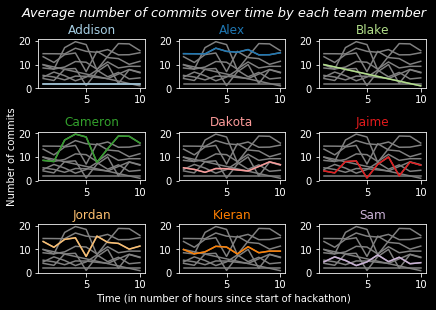

In [111]:
fig

In [109]:
names=df_wide.drop(columns='hour')
names.columns

# df_wide

Index(['addison', 'alex', 'blake', 'cameron', 'dakota', 'jaime', 'jordan',
       'kieran', 'sam'],
      dtype='object', name='variable')

In [44]:
names.columns[0]

'addison'

((0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392))

Object `tick_params` not found.
